# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [17]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [20]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [21]:
# Fetch the Bitcoin news articles
BTC_news_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
BTC_news_articles['totalResults']

5226

In [27]:
# Fetch the Ethereum news articles
ETH_news_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
ETH_news_articles['totalResults']

1326

In [23]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [25]:
# Create the Bitcoin sentiment scores DataFrame
BTC_sentiment_df = get_sentiment_score(BTC_news_articles, 'content')
BTC_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
5,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
6,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
7,0.0258,0.073,0.850,0.076,image copyrightGetty Images\r\nBitcoin has hit...
8,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...


In [28]:
# Create the ethereum sentiment scores DataFrame
ETH_sentiment_df = get_sentiment_score(ETH_news_articles, 'content')
ETH_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
5,0.3612,0.000,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...
6,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
7,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
8,0.2500,0.000,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions..."
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...


In [30]:
# Describe the Bitcoin Sentiment
BTC_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.278550,0.015900,0.899100,0.084950
std,0.377834,0.033444,0.074112,0.073759
min,-0.585900,0.000000,0.781000,0.000000
25%,0.000000,0.000000,0.846250,0.000000
50%,0.337550,0.000000,0.890000,0.086500
75%,0.636900,0.000000,0.962500,0.148750
max,0.801600,0.103000,1.000000,0.209000


In [31]:
# Describe the Ethereum Sentiment
ETH_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.135540,0.015450,0.935100,0.049450
std,0.284275,0.032516,0.066441,0.058508
min,-0.493900,0.000000,0.797000,0.000000
25%,0.000000,0.000000,0.878250,0.000000
50%,0.038600,0.000000,0.944500,0.026000
75%,0.286575,0.000000,1.000000,0.080250
max,0.636900,0.099000,1.000000,0.155000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC with .0854

Q: Which coin had the highest compound score?

A: BTC with .8016

Q. Which coin had the highest positive score?

A: BTC with .209

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [35]:
# Expand the default stopwords list if necessary

import nltk
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [48]:

import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')


# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)

    # Create a list of the words

    words = word_tokenize(re_clean.lower())


    # Remove the stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
# Create a new tokens column for bitcoin
BTC_sentiment_df['tokens'] = BTC_sentiment_df['content'].apply(tokenizer)
BTC_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, 2020, come, close,..."
4,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, india, considering, 18, tax, bitc..."


In [50]:
# Create a new tokens column for ethereum
ETH_sentiment_df['tokens'] = ETH_sentiment_df['content'].apply(tokenizer)
ETH_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[security, exchange, commission, plan, sue, ri..."
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, derided, serious, investor, bubble, ..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [55]:

def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


BTC_tokens = get_tokens(BTC_sentiment_df)
ETH_tokens = get_tokens(ETH_sentiment_df)

In [59]:

def ngram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [64]:
# Generate the Bitcoin N-grams where N=2
ngram_BTC = bigram_counter(BTC_tokens, 2)
ngram_BTC

{('visahas', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'offer'): 1,
 ('offer', 'first'): 1,
 ('first', 'reward'): 1,
 ('reward', 'credit'): 1,
 ('credit', 'card'): 1,
 ('card', 'pay'): 1,
 ('pay', 'bitcoin'): 1,
 ('bitcoin', 'rather'): 1,
 ('rather', 'cash'): 1,
 ('cash', 'worth'): 1,
 ('worth', 'applying'): 1,
 ('applying', 'unless'): 1,
 ('unless', 'youre'): 1,
 ('youre', 'extremely'): 1,
 ('extremely', 'bullish'): 1,
 ('bullish', '2239'): 1,
 ('2239', 'char'): 1,
 ('char', 'reaching'): 1,
 ('reaching', 'previous'): 1,
 ('previous', 'alltime'): 1,
 ('alltime', 'high'): 3,
 ('high', 'november'): 1,
 ('november', '30th'): 1,
 ('30th', '2020'): 1,
 ('2020', 'december'): 1,
 ('december', '1st'): 1,
 ('1st', '2020'): 1,
 ('2020', 'bitcoin'): 1,
 ('bitcoin', 'trading'): 1,
 ('trading', 'well'): 1,
 ('well', '20000'): 1,
 ('20000', 'surpassed'): 1,
 ('surpassed', 'previous'): 1,
 ('previous', 'peak'): 1,

In [65]:
# Generate the Ethereum N-grams where N=2
ngram_ETH = bigram_counter(ETH_tokens, 2)
ngram_ETH

{('security', 'exchange'): 1,
 ('exchange', 'commission'): 1,
 ('commission', 'plan'): 1,
 ('plan', 'sue'): 1,
 ('sue', 'ripple'): 1,
 ('ripple', 'federal'): 1,
 ('federal', 'civil'): 1,
 ('civil', 'court'): 1,
 ('court', 'selling'): 1,
 ('selling', 'unregistered'): 1,
 ('unregistered', 'security'): 1,
 ('security', 'according'): 1,
 ('according', 'news'): 1,
 ('news', 'release'): 1,
 ('release', 'published'): 1,
 ('published', 'online'): 1,
 ('online', 'cryptocurrency'): 1,
 ('cryptocurrency', 'company'): 1,
 ('company', 'late'): 1,
 ('late', '2950'): 1,
 ('2950', 'char'): 1,
 ('char', 'bitcoin'): 1,
 ('bitcoin', 'derided'): 1,
 ('derided', 'serious'): 1,
 ('serious', 'investor'): 1,
 ('investor', 'bubble'): 1,
 ('bubble', 'ponzi'): 1,
 ('ponzi', 'scheme'): 1,
 ('scheme', 'year'): 1,
 ('year', 'become'): 1,
 ('become', 'irresistible'): 1,
 ('irresistible', 'investment'): 1,
 ('investment', 'many'): 1,
 ('many', 'themjust'): 1,
 ('themjust', 'wednesday'): 1,
 ('wednesday', 'bitcoin'): 

In [70]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [69]:
# Get the top 10 words for Bitcoin
top_10_token_BTC = token_count(BTC_tokens)
top_10_token_BTC

[('char', 20),
 ('bitcoin', 13),
 ('reuters', 9),
 ('cryptocurrency', 7),
 ('2020', 6),
 ('year', 6),
 ('alltime', 4),
 ('november', 4),
 ('20000', 4),
 ('new', 4)]

In [68]:
# Get the top 10 words for Ethereum
top_10_token_ETH = token_count(ETH_tokens)
top_10_token_ETH

[('char', 20),
 ('bitcoin', 15),
 ('reuters', 14),
 ('currency', 9),
 ('u', 9),
 ('cryptocurrency', 8),
 ('taken', 8),
 ('2020', 8),
 ('fund', 7),
 ('photo', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

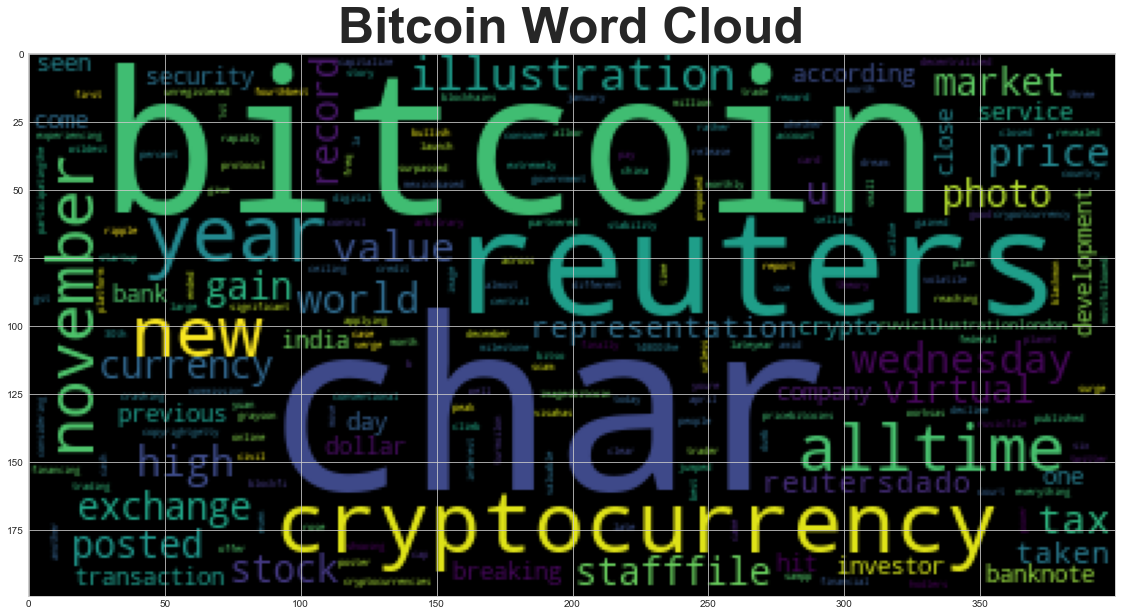

In [77]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(BTC_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

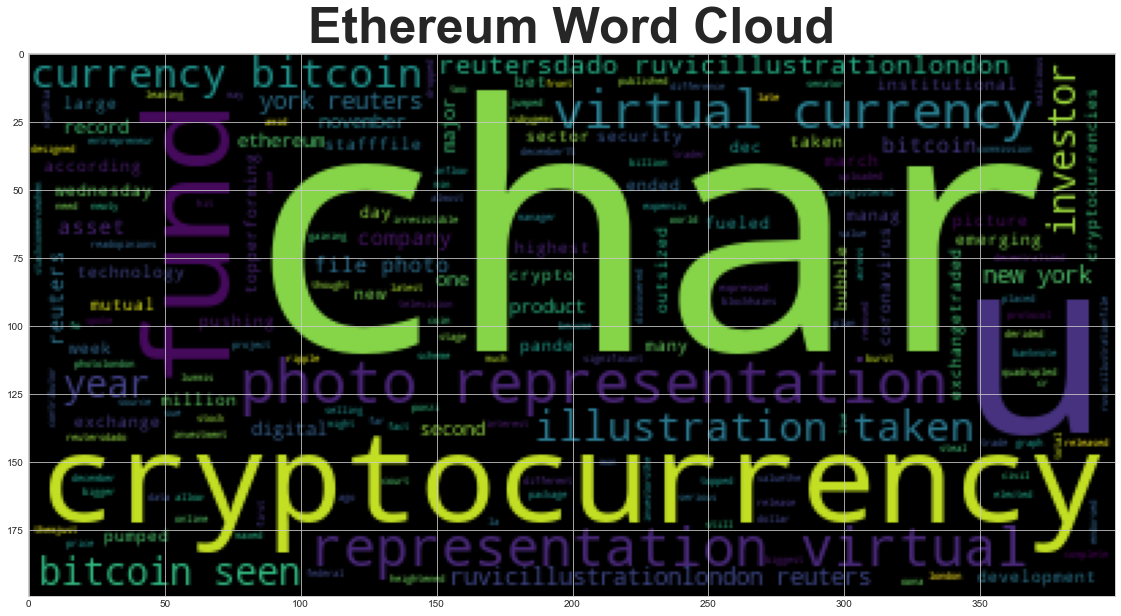

In [79]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ETH_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [92]:
import spacy
from spacy import displacy

In [93]:
# Optional - download a language model for SpaCy
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-93-e5333389e740>, line 2)

In [94]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

## Bitcoin NER

In [88]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(BTC_sentiment_df['content'])

In [90]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

NameError: name 'nlp' is not defined

In [89]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [33]:
# List all Entities
# YOUR CODE HERE!

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f